<h1 align="center"> Machine Learning: Assignment 1</h1><br>

In [4]:
%matplotlib inline
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pylab import rcParams

<h2 align="center"> Problem 1</h2><br>

<strong><p style="font-size:120%;"></strong> Download the Weather data set (a simple data set describing whether or not to play tennis based on the weather conditions)

In [5]:
weather = pd.read_csv('data/weather_dataset.csv')

<strong></strong> Represent the following table using 
a data structure of your choice



In [6]:
weather

,Day,outlook,temperature,humidity,windy,play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,70,96,False,yes
4,5,rainy,68,80,False,yes
5,6,rainy,65,70,True,no
6,7,overcast,64,65,True,yes
7,8,sunny,72,95,False,no
8,9,sunny,69,70,False,yes
9,10,rainy,75,80,False,yes


In [7]:
#check the datatypes of each column 
weather.dtypes

Day             int64
outlook        object
temperature     int64
humidity        int64
windy            bool
play           object
dtype: object

<ul>
  <li>Calculate the mean temperature and mean humidity</li>
  <li>Print outlook and play for 
those days where the temperature is greater than the 
average temperature</li>
  <li>Print outlook and play for those days where the humidity is greater than the 
average humidity</li>
  <li>Convert the temperature
to Celsius and add a new column therefore in the table. 
Use the following conversion equation</li>C = (F-32) *5/9
</ul>

In [8]:
mean_temp = np.sum(weather.temperature.values) / float(len(weather.temperature.values))
mean_humid = np.sum(weather.humidity.values) / float(len(weather.humidity.values))

print 'mean temperature: ', mean_temp
print 'mean humid: ', mean_humid

mean temperature:  73.5714285714
mean humid:  81.6428571429


Print outlook and play for those days where the temperature is greater than the average temperature

In [9]:
temp_condition = weather['temperature'] > mean_temp

great_mean_temp = weather[['Day','outlook']][temp_condition]
pd.DataFrame(great_mean_temp)

,Day,outlook
0,1,sunny
1,2,sunny
2,3,overcast
9,10,rainy
10,11,sunny
12,13,overcast


Print outlook and play for those days where the humidity is greater than the average humidity

In [10]:
humid_condition = weather['humidity'] > mean_humid

great_mean_humid = weather[['Day','outlook']][humid_condition]
pd.DataFrame(great_mean_humid)

,Day,outlook
0,1,sunny
1,2,sunny
2,3,overcast
3,4,rainy
7,8,sunny
11,12,overcast
13,14,rainy


Convert the temperature
to Celsius and add a new column therefore in the table. 
Use the following conversion equation 
C = (F-32) *5/9 

In [11]:
weather['Celsius'] = weather['temperature'].apply(lambda x:(x -32.0) *5.0/9)
weather

,Day,outlook,temperature,humidity,windy,play,Celsius
0,1,sunny,85,85,False,no,29.444444
1,2,sunny,80,90,True,no,26.666667
2,3,overcast,83,86,False,yes,28.333333
3,4,rainy,70,96,False,yes,21.111111
4,5,rainy,68,80,False,yes,20.000000
5,6,rainy,65,70,True,no,18.333333
6,7,overcast,64,65,True,yes,17.777778
7,8,sunny,72,95,False,no,22.222222
8,9,sunny,69,70,False,yes,20.555556
9,10,rainy,75,80,False,yes,23.888889


<strong><p style="font-size:120%;">1.</strong> How often do you play tennis independent of the other attributes?

In [12]:
def NoString(x):
    if x == 'no':
        y = 0
    else:
        y = 1.0
    return y

weather.play = weather.play.apply(NoString)
print weather.play.sum()/float(len(weather.play))
weather.play.head(15)

0.642857142857


0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: float64

<strong><p style="font-size:120%;">2.</strong> How often do you play tennis when it is &quot;sunny&quot;?

In [13]:
#data.groupby('month')['date'].count()
len(weather[(weather['outlook'] == 'sunny') & (weather['play'] == 1)]) / float(len(weather))
#weather[weather.outlook == 'sunny'].play

0.14285714285714285

<strong><p style="font-size:120%;">3.</strong> Compare the average, minimum and maximum temperature when you play tennis?

In [14]:
weather

,Day,outlook,temperature,humidity,windy,play,Celsius
0,1,sunny,85,85,False,0,29.444444
1,2,sunny,80,90,True,0,26.666667
2,3,overcast,83,86,False,1,28.333333
3,4,rainy,70,96,False,1,21.111111
4,5,rainy,68,80,False,1,20.000000
5,6,rainy,65,70,True,0,18.333333
6,7,overcast,64,65,True,1,17.777778
7,8,sunny,72,95,False,0,22.222222
8,9,sunny,69,70,False,1,20.555556
9,10,rainy,75,80,False,1,23.888889


In [15]:
print 'mean:', weather[(weather['play'] == 1)]['temperature'].mean()
print 'min:', weather[(weather['play'] == 1)]['temperature'].min()
print 'max:', weather[(weather['play'] == 1)]['temperature'].max()

mean: 73.0
min: 64
max: 83


<strong><p style="font-size:120%;">4.</strong> Compare the average, minimum and maximum humidity when you play tennis?

In [16]:
print 'mean:', weather[(weather['play'] == 1)]['humidity'].mean()
print 'min:', weather[(weather['play'] == 1)]['humidity'].min()
print 'max:', weather[(weather['play'] == 1)]['humidity'].max()

mean: 79.1111111111
min: 65
max: 96


<strong><p style="font-size:120%;">5.</strong> Plot a scatter plot (x,y diagramm) of humidity (x) and temperature (y) when you play tennis compared to when you do not play tennis. 

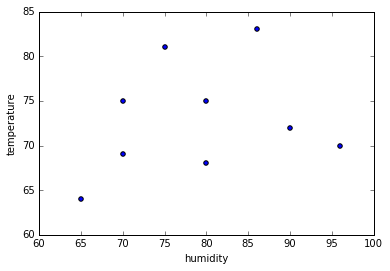

In [17]:
#play tennis 
weather[(weather['play'] == 1)].plot(kind='scatter', x='humidity', y='temperature')

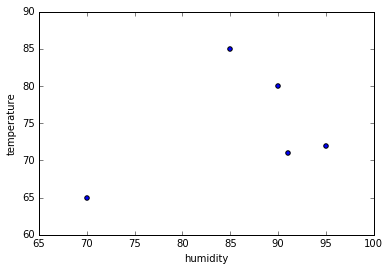

In [18]:
# NO tennis 
weather[(weather['play'] == 0)].plot(kind='scatter', x='humidity', y='temperature')

<h2 align="center"> Problem 2</h2><br>

In [49]:
!bash getLineNum.sh
# this gets the line numbers where WY, US, and AL occur

In [60]:
files = ["new_data/st0009ts.txt", "new_data/st1019ts.txt",\
         "new_data/st2029ts.txt", "new_data/st3039ts.txt",\
         "new_data/st4049ts.txt", "new_data/st5060ts.txt",\
         "new_data/st6070ts.txt", "new_data/st7080ts.txt",\
         "new_data/st8090ts.txt"]
f1 = pd.read_fwf("new_data/st0009ts.txt",header = None,  names=[f]);
for f in files[1:]: 
    f2 = pd.read_fwf(f,header = None,  names=[f]);
    f1 = pd.concat([f1, f2], axis=1)
f1

,new_data/st8090ts.txt,new_data/st1019ts.txt,new_data/st2029ts.txt,new_data/st3039ts.txt,new_data/st4049ts.txt,new_data/st5060ts.txt,new_data/st6070ts.txt,new_data/st7080ts.txt,new_data/st8090ts.txt
WY,72,72,72,72,70,78,75,65,62
US,18,18,18,18,16,19,19,5,4
AL,24,24,24,24,22,28,25,15,12


In [19]:

count = 0
new_file = []
with open('data/st6070ts.txt') as f:
    for line in f:
        f = open("data/file1.txt","a")
        if count > (min_max[0] -4) and count < min_max[1]:
            new_file.append(line)
            f.write(line)
        count += 1
    f.close()
f1 = pd.read_fwf('data/file1.txt', index_col=0);
f1 = f1.dropna()
f1.head()

"""
f1 = pd.read_fwf('data/F1.txt',header = None,  names=['Row #']);
min_max = f1.values.min(), f1.values.max()
print 'min:', min_max[0],  '\nmax:', min_max[1]
os.remove("data/F1.txt")
f1
"""

'\nf1 = pd.read_fwf(\'data/F1.txt\',header = None,  names=[\'Row #\']);\nmin_max = f1.values.min(), f1.values.max()\nprint \'min:\', min_max[0],  \'\nmax:\', min_max[1]\nos.remove("data/F1.txt")\nf1\n'

In [20]:
"""
count = 0
new_file = []
with open('data/st6070ts.txt') as f:
    for line in f:
        f = open("data/file1.txt","a")
        if count > (min_max[0] -4) and count < min_max[1]:
            new_file.append(line)
            f.write(line)
        count += 1
    f.close()
f1 = pd.read_fwf('data/file1.txt', index_col=0);
f1 = f1.dropna()
f1.head()
"""

'\ncount = 0\nnew_file = []\nwith open(\'data/st6070ts.txt\') as f:\n    for line in f:\n        f = open("data/file1.txt","a")\n        if count > (min_max[0] -4) and count < min_max[1]:\n            new_file.append(line)\n            f.write(line)\n        count += 1\n    f.close()\nf1 = pd.read_fwf(\'data/file1.txt\', index_col=0);\nf1 = f1.dropna()\nf1.head()\n'

In [21]:
#!bash lama.sh

<h2 align="center"> Problem 5</h2><br>